In [1]:
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import math
import numpy as np
import pandas as pd

import csv
import os

In [2]:
# Load data

# Expects all relevant files to be in this folder
folder = 'FDs'
files = [f for f in os.listdir(folder) if 'Lung' in f]

df_list = []
for f in files:
    df_dict = {}
    with open(os.path.join(folder, f), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        csv_data = list(csv_reader)
    
    sc_arr = np.asarray(csv_data[4:]).astype(int)
    sizes, counts = sc_arr[:, 0], sc_arr[:, 1]
    
    df_dict = {
        'SID':                 '_'.join(f.split('_')[:-2]),
        'Lobe':                '',
        'Fractal_Dimension':   float(csv_data[0][1]),
        'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
        'Sizes':               sizes,
        'Counts':              counts,
    }
    
    if 'left' in f:
        df_dict['Lobe'] = 'left'
    elif 'right' in f:
        df_dict['Lobe'] = 'right'
    else:
        df_dict['Lobe'] = 'whole'
    
    df_list.append(df_dict)

df = pd.DataFrame(df_list)
display(df)

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts
0,001_pect_phfirst_060413,left,2.313082,"[-2.3130816202789095, 13.895248532201418]","[128, 64, 32, 16, 8, 4, 2]","[15, 69, 330, 1821, 9867, 44330, 204723]"
1,001_pect_phfirst_060413,right,2.420838,"[-2.420837847458621, 14.496203971249454]","[128, 64, 32, 16, 8, 4, 2]","[16, 79, 421, 2487, 14778, 71185, 331731]"
2,001_pect_phfirst_060413,whole,2.368625,"[-2.368624972646306, 14.914710703893443]","[256, 128, 64, 32, 16, 8, 4, 2]","[6, 31, 153, 755, 4305, 24633, 115492, 536835]"
3,002_pect_phfirst_050913,left,2.327606,"[-2.327605909711189, 13.746505443552422]","[128, 64, 32, 16, 8, 4, 2]","[12, 55, 279, 1499, 8237, 37699, 173043]"
4,002_pect_phfirst_050913,right,2.311592,"[-2.3115915241510203, 13.952682016766452]","[128, 64, 32, 16, 8, 4, 2]","[16, 68, 367, 2043, 10819, 46750, 207703]"
...,...,...,...,...,...,...
664,387_pect_phfirst_090117,right,2.333411,"[-2.333410981147058, 13.781155612138587]","[128, 64, 32, 16, 8, 4, 2]","[12, 53, 283, 1590, 8992, 39753, 165099]"
665,387_pect_phfirst_090117,whole,2.352999,"[-2.352999263440592, 14.50372411321365]","[128, 64, 32, 16, 8, 4, 2]","[20, 112, 565, 3143, 17724, 78487, 328214]"
666,388_pect_phfirst_080516,left,2.302641,"[-2.3026406278494016, 12.579665812534031]","[64, 32, 16, 8, 4, 2]","[19, 100, 502, 2648, 12190, 54307]"
667,388_pect_phfirst_080516,right,2.281048,"[-2.2810482771023035, 12.836789208277484]","[128, 64, 32, 16, 8, 4, 2]","[7, 24, 127, 646, 3648, 16821, 74265]"


In [3]:
# Generate Stats!

r_squared_list = []
residuals_list = []
pairwise_slopes_list = []
for index, row in df.iterrows():
    sizes_log = np.log(row['Sizes'])
    counts_log = np.log(row['Counts'])
    coeffs = row['Coefficients']
    
    # Calculate R Squared
    correlation_matrix = np.corrcoef(sizes_log, counts_log)
    r_squared = correlation_matrix[0, 1]**2
    r_squared_list.append(r_squared)
    
    # Calculate Residuals
    residuals = counts_log - np.polyval(coeffs, sizes_log)
    residuals_list.append(residuals)
    
    # Calculate Pairwise Slopes
    pairwise_slopes = (counts_log[1:] - counts_log[:-1]) / (sizes_log[1:] - sizes_log[:-1])
    pairwise_slopes_list.append(pairwise_slopes)

df['R_Squared'] = r_squared_list
df['Residuals'] = residuals_list
df['Pairwise_Slopes'] = pairwise_slopes_list

df

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts,R_Squared,Residuals,Pairwise_Slopes
0,001_pect_phfirst_060413,left,2.313082,"[-2.3130816202789095, 13.895248532201418]","[128, 64, 32, 16, 8, 4, 2]","[15, 69, 330, 1821, 9867, 44330, 204723]",0.999633,"[0.035943693410284805, -0.04130600659602113, -...","[-2.201633861169651, -2.2577977574676473, -2.4..."
1,001_pect_phfirst_060413,right,2.420838,"[-2.420837847458621, 14.496203971249454]","[128, 64, 32, 16, 8, 4, 2]","[16, 79, 421, 2487, 14778, 71185, 331731]",0.999483,"[0.022363250901578535, -0.05877454742993127, -...","[-2.3037807481771027, -2.413895674889294, -2.5..."
2,001_pect_phfirst_060413,whole,2.368625,"[-2.368624972646306, 14.914710703893443]","[256, 128, 64, 32, 16, 8, 4, 2]","[6, 31, 153, 755, 4305, 24633, 115492, 536835]",0.999735,"[0.011494538083927086, 0.011916551747353843, -...","[-2.369233809665719, -2.303191532305776, -2.30..."
3,002_pect_phfirst_050913,left,2.327606,"[-2.327605909711189, 13.746505443552422]","[128, 64, 32, 16, 8, 4, 2]","[12, 55, 279, 1499, 8237, 37699, 173043]",0.999660,"[0.032015522632419025, -0.05893141569408744, -...","[-2.1963972128035034, -2.3427615983045285, -2...."
4,002_pect_phfirst_050913,right,2.311592,"[-2.3115915241510203, 13.952682016766452]","[128, 64, 32, 16, 8, 4, 2]","[16, 68, 367, 2043, 10819, 46750, 207703]",0.999237,"[0.03581873847415329, -0.11953542616106727, -0...","[-2.0874628412503395, -2.4321734115928746, -2...."
...,...,...,...,...,...,...,...,...,...
664,387_pect_phfirst_090117,right,2.333411,"[-2.333410981147058, 13.781155612138587]","[128, 64, 32, 16, 8, 4, 2]","[12, 53, 283, 1590, 8992, 39753, 165099]",0.999006,"[0.025531736337305322, -0.10648024256827116, -...","[-2.1429579538420427, -2.4167377882686845, -2...."
665,387_pect_phfirst_090117,whole,2.352999,"[-2.352999263440592, 14.50372411321365]","[128, 64, 32, 16, 8, 4, 2]","[20, 112, 565, 3143, 17724, 78487, 328214]",0.999014,"[-0.09116820246533974, 0.0006235899622888397, ...","[-2.485426827170241, -2.334752135244948, -2.47..."
666,388_pect_phfirst_080516,left,2.302641,"[-2.3026406278494016, 12.579665812534031]","[64, 32, 16, 8, 4, 2]","[19, 100, 502, 2648, 12190, 54307]",0.999570,"[-0.05881367914802205, 0.005848668637034926, 0...","[-2.3959286763311414, -2.327687364176046, -2.3..."
667,388_pect_phfirst_080516,right,2.281048,"[-2.2810482771023035, 12.836789208277484]","[128, 64, 32, 16, 8, 4, 2]","[7, 24, 127, 646, 3648, 16821, 74265]",0.998763,"[0.17683621473990718, -0.17212228596204282, -0...","[-1.7776075786635521, -2.4037221860510107, -2...."


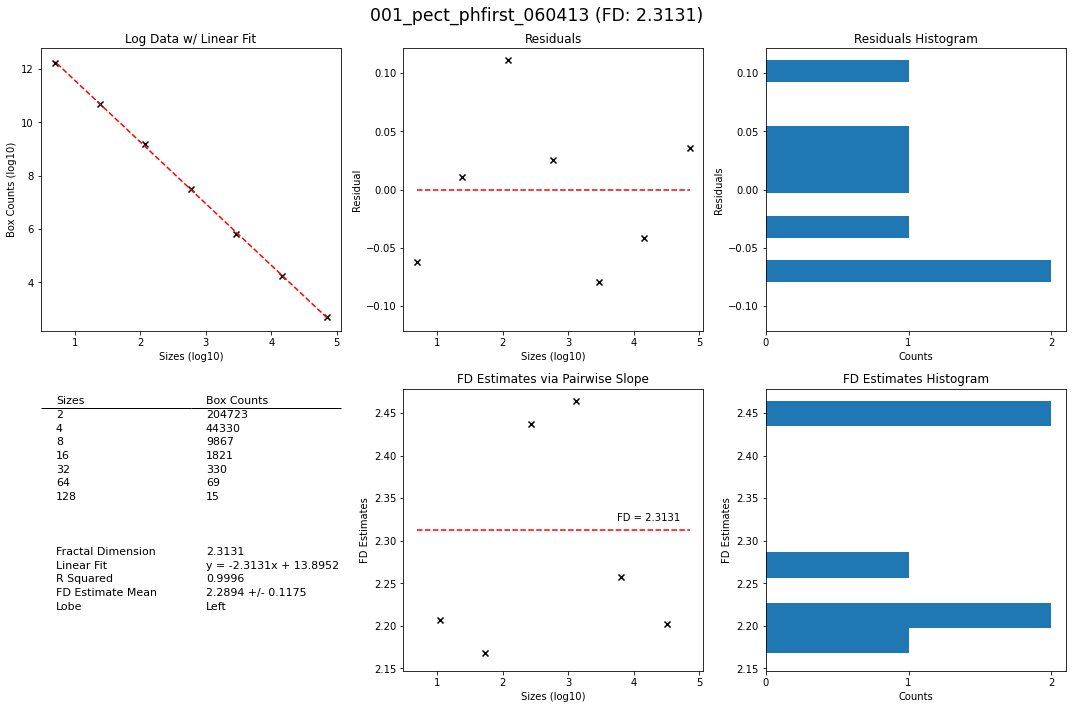

In [4]:
# Generate Figure!

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid} (FD: {fd:.4f})', fontsize='xx-large')

    # Log Size vs Log Count w/ Linear Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log10)')
    axes[0, 0].set_ylabel('Box Counts (log10)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    axes[0, 1].set_title('Residuals')
    axes[0, 1].set_xlabel('Sizes (log10)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)

    # Residuals Hist
    axes[0, 2].hist(residuals, orientation='horizontal')
    axes[0, 2].set_title('Residuals Histogram')
    axes[0, 2].set_xlabel('Counts')
    axes[0, 2].set_ylabel('Residuals')
    axes[0, 2].set_ylim(-yabs_max, yabs_max)
    axes[0, 2].set_xticks(list(range(0, math.floor(axes[0,2].get_xticks()[-1])+1)))

    # Pairwise_Slope w/ FD Line
    axes[1, 1].hlines(fd, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[1, 1].scatter(sizes_log_half, -pairwise_slopes, c='k', marker='x')
    axes[1, 1].set_title('FD Estimates via Pairwise Slope')
    axes[1, 1].set_xlabel('Sizes (log10)')
    axes[1, 1].set_ylabel('FD Estimates')
    axes[1, 1].text(max(sizes_log)-1.1, fd+0.01, f'FD = {fd:.5}')
    yabs_max = abs(max(axes[1, 1].get_ylim()-fd, key=abs))
    axes[1, 1].set_ylim(fd-yabs_max, fd+yabs_max)

    # Pairwise_Slope Hist
    axes[1, 2].hist(-pairwise_slopes, orientation='horizontal')
    axes[1, 2].set_title('FD Estimates Histogram')
    axes[1, 2].set_xlabel('Counts')
    axes[1, 2].set_ylabel('FD Estimates')
    axes[1, 2].set_ylim(fd-yabs_max, fd+yabs_max)
    axes[1, 2].set_xticks(list(range(0, math.floor(axes[1,2].get_xticks()[-1])+1)))

    # Data Table
    fd_estimate_mean = np.mean(-pairwise_slopes)
    fd_estimate_std = np.std(-pairwise_slopes)

    cells = [['Sizes', 'Box Counts']]
    for size, count in zip(df['Sizes'][num][::-1], df['Counts'][num][::-1]):
        cells.append([str(size), str(count)])
    for i in range(0, 10-len(df['Sizes'][num])):
        cells.append(['', ''])

    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['R Squared', f'{r_squared:.4f}'])
    cells.append(['FD Estimate Mean', f'{fd_estimate_mean:.4f} +/- {fd_estimate_std:.4f}'])
    cells.append(['Lobe', f'{lobe.capitalize()}'])

    axes[1, 0].axis('tight')
    axes[1, 0].axis('off')
    table = axes[1, 0].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
    table[(0, 0)].visible_edges = 'B'
    table[(0, 1)].visible_edges = 'B'

    plt.tight_layout()
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
    # Close all figures except for the first to double check
    if num > 0:
        plt.close(fig)